<a href="https://colab.research.google.com/github/Hyelimee/honmandeep/blob/main/%ED%98%BC%EB%A7%8C%EB%94%A5_chapter1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

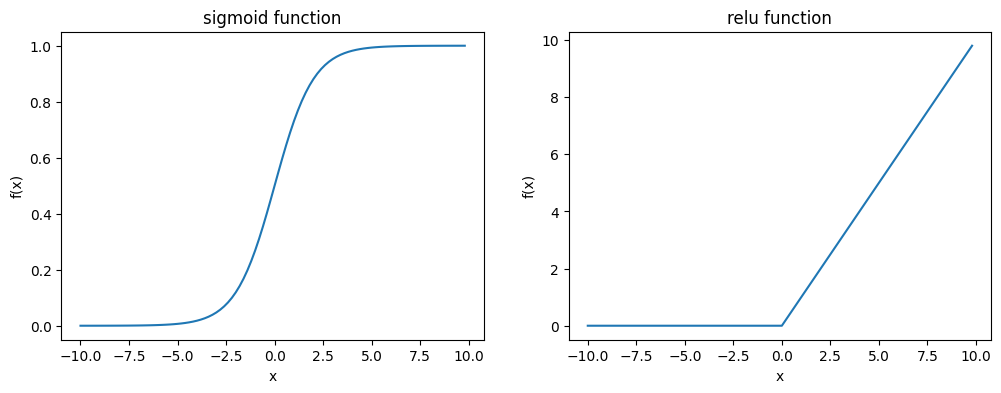

In [19]:
#활성화함수
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

x = np.arange(-10, 10, 0.2) #-10~10 사이에서 0.2 간격으로 실수값 생성

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(x, expit(x))  #시그모이드 함수는 사이파이에서 expit함수로
axs[0].set_title('sigmoid function')
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')

axs[1].plot(x, x.clip(0))   #렐루 함수는 넘파이에서 clip 메서드로
axs[1].set_title('relu function')
axs[1].set_xlabel('x')
axs[1].set_ylabel('f(x)')
plt.show()

In [5]:
#LeNet-5 모델 만들기
import keras
from keras import layers

lenet5 = keras.Sequential()  #클래스 객체 생성
lenet5.add(layers.Input(shape=(28, 28, 1)))
lenet5.add(layers.Conv2D(filters=6, kernel_size=5, activation='sigmoid', padding='same'))
lenet5.add(layers.AveragePooling2D(pool_size=2))
lenet5.add(layers.Conv2D(filters=16, kernel_size=5, activation='sigmoid'))
lenet5.add(layers.AveragePooling2D(pool_size=2))
lenet5.add(layers.Flatten())
lenet5.add(layers.Dense(120, activation='sigmoid'))
lenet5.add(layers.Dense(84, activation='sigmoid'))
lenet5.add(layers.Dense(10, activation='softmax'))

In [6]:
lenet5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
#훈련데이터 준비하기(케라스를 이용하여 GCP(구글클라우드플랫폼)에 저장된 데이터를 다운로드하여 읽을 수 있음)

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [18]:
#타겟 값이 어떻게 되어있는지 확인
print(train_target)

[7 3 5 ... 6 6 1]


In [9]:
#훈련 데이터 크기 확인
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


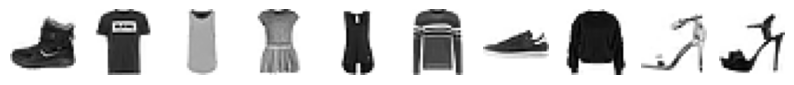

In [20]:
#샘플로 데이터 몇개 보자
fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [11]:
#LeNet-5 모델에서 입력 샘플 하나의 크기를 (28, 28, 1)로 지정했기 때문에 train_input 데이터도 그에 맞춰줘야함
train_input = train_input.reshape(-1, 28, 28, 1) / 255.0
train_input.shape

(60000, 28, 28, 1)

In [12]:
#trainset에서 validation set을 나눠보자
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [13]:
#모델 훈련하기(콜백 정의:훈련도중 최상의 모델을 저장하고, 검증세트에 대한 손실이 증가하기 전에 조기 종료)
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'lenet5-model.keras', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=2, restore_best_weights=True)

In [14]:
#손실함수지정, 훈련 과정 평가용 accuracy 지표 추가
lenet5.compile(loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [12]:
#훈련
hist = lenet5.fit(train_scaled, train_target, epochs=20,
                  validation_data=(val_scaled, val_target),
                  callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.4108 - loss: 1.5865 - val_accuracy: 0.7330 - val_loss: 0.7045
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 74s 23ms/step - accuracy: 0.7396 - loss: 0.6789 - val_accuracy: 0.7673 - val_loss: 0.6011
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 0.7726 - loss: 0.5917 - val_accuracy: 0.7945 - val_loss: 0.5374
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.8039 - loss: 0.5176 - val_accuracy: 0.8249 - val_loss: 0.4776
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.8283 - loss: 0.4604 - val_accuracy: 0.8378 - val_loss: 0.4400
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.8393 - loss: 0.4334 - val_accuracy: 0.8445 - val_loss: 0.4207
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.8467 - loss: 0.4154 - val_accuracy: 0.8369 - val_loss: 0.4250
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.8534 -

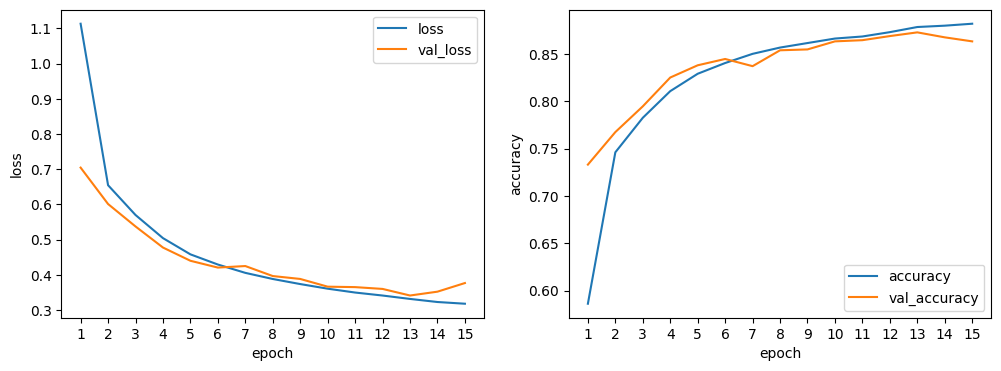

In [13]:
#hist에 저장한 모델 성능 확인
epochs = range(1, len(hist.history['loss'])+1)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(epochs, hist.history['loss'], label='loss')
axs[0].plot(epochs, hist.history['val_loss'], label='val_loss')
axs[0].set_xticks(epochs) #set_xticks를 사용함으로써 epoch가 소수점 단위로 안나옴
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('loss')

axs[1].plot(epochs, hist.history['accuracy'], label='accuracy')
axs[1].plot(epochs, hist.history['val_accuracy'], label='val_accuracy')
axs[1].set_xticks(epochs)
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('accuracy')

axs[0].legend()
axs[1].legend()
plt.show()

In [54]:
#저장한 모델 불러오기
from tensorflow import keras

lenet5_re = keras.models.load_model('lenet5-model.keras')

In [55]:
import numpy as np

x_sample = val_scaled
y_sample = val_target

y_pred = lenet5_re.predict(x_sample)
y_pred_classes = np.argmax(y_pred, axis=1)

wrong_idx = np.where(y_pred_classes != y_sample)[0]
print("전체 validation 샘플 수:", len(val_target))
print("틀린 샘플 수:", len(wrong_idx))

# 정확도 확인
accuracy = np.sum(y_pred_classes == y_sample) / len(y_sample)
print(f"정확도: {accuracy:.4f}")


375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
전체 validation 샘플 수: 12000
틀린 샘플 수: 1529
정확도: 0.8726


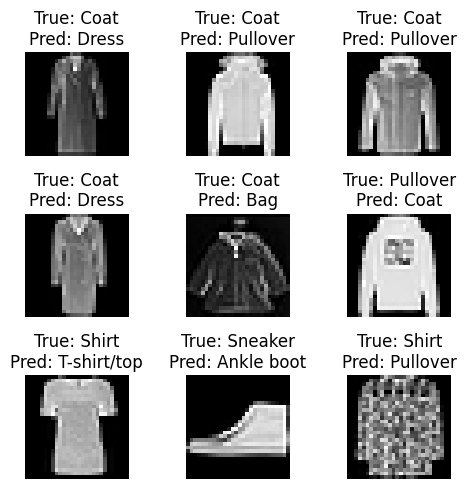

In [57]:
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(5, 5))
for i, idx in enumerate(wrong_idx[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_sample[idx].squeeze(), cmap='gray')
    plt.title(f"True: {class_names[y_sample[idx]]}\nPred: {class_names[y_pred_classes[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
